In [1]:
import numpy as np
import pandas as pd
from os import listdir

In [2]:
household_info = pd.read_csv("../data/raw/informations_households.csv")

In [3]:
## Future
import os
import glob

path = "../data/raw/daily_dataset/"
allFiles = glob.glob(os.path.join(path,"*.csv"))


np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
block_daily = pd.DataFrame(comb_np_array)

block_daily.columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min']

/home/rob/anaconda3/envs/smlondon/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [4]:
block_daily = pd.merge(block_daily, household_info)

In [5]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000019,2011-12-07,0.1805,0.2335,0.874,18,0.184434,4.203,0.119,Std,ACORN-K,Adversity,block_76
1,MAC000019,2011-12-08,0.1365,0.163021,0.805,48,0.149069,7.825,0.018,Std,ACORN-K,Adversity,block_76
2,MAC000019,2011-12-09,0.1345,0.167312,1.106,48,0.176914,8.031,0.016,Std,ACORN-K,Adversity,block_76
3,MAC000019,2011-12-10,0.1285,0.143354,0.728,48,0.123578,6.881,0.017,Std,ACORN-K,Adversity,block_76
4,MAC000019,2011-12-11,0.1195,0.166688,1.038,48,0.194749,8.001,0.018,Std,ACORN-K,Adversity,block_76


In [6]:
block_daily['day'] = pd.to_datetime(block_daily['day'])

In [7]:
block_daily.isnull().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
stdorToU             0
Acorn                0
Acorn_grouped        0
file                 0
dtype: int64

In [8]:
block_daily.drop('energy_std', axis = 1, inplace = True)

In [9]:
block_daily.isnull().sum()

LCLid             0
day               0
energy_median    30
energy_mean      30
energy_max       30
energy_count      0
energy_sum       30
energy_min       30
stdorToU          0
Acorn             0
Acorn_grouped     0
file              0
dtype: int64

In [10]:
block_daily.dropna(inplace = True)

In [11]:
block_daily.isnull().sum()

LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_sum       0
energy_min       0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

In [12]:
block_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510403 entries, 0 to 3510432
Data columns (total 12 columns):
LCLid            object
day              datetime64[ns]
energy_median    object
energy_mean      object
energy_max       object
energy_count     object
energy_sum       object
energy_min       object
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtypes: datetime64[ns](1), object(11)
memory usage: 348.2+ MB


In [13]:
block_daily['energy_median'] = block_daily['energy_median'].astype('float')
block_daily['energy_mean'] = block_daily['energy_mean'].astype('float')
block_daily['energy_max'] = block_daily['energy_max'].astype('float')
block_daily['energy_count'] = block_daily['energy_count'].astype('int')
block_daily['energy_sum'] = block_daily['energy_sum'].astype('float')
block_daily['energy_min'] = block_daily['energy_min'].astype('float')

In [14]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000019,2011-12-07,0.1805,0.233500,0.874,18,4.203,0.119,Std,ACORN-K,Adversity,block_76
1,MAC000019,2011-12-08,0.1365,0.163021,0.805,48,7.825,0.018,Std,ACORN-K,Adversity,block_76
2,MAC000019,2011-12-09,0.1345,0.167312,1.106,48,8.031,0.016,Std,ACORN-K,Adversity,block_76
3,MAC000019,2011-12-10,0.1285,0.143354,0.728,48,6.881,0.017,Std,ACORN-K,Adversity,block_76
4,MAC000019,2011-12-11,0.1195,0.166688,1.038,48,8.001,0.018,Std,ACORN-K,Adversity,block_76


In [15]:
block_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510403 entries, 0 to 3510432
Data columns (total 12 columns):
LCLid            object
day              datetime64[ns]
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count     int64
energy_sum       float64
energy_min       float64
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 348.2+ MB


In [16]:
block_daily['Acorn_grouped'].value_counts()

Affluent       1407678
Adversity      1135331
Comfortable     937061
ACORN-U          29552
ACORN-             781
Name: Acorn_grouped, dtype: int64

In [17]:
block_daily.drop(block_daily[(block_daily.Acorn_grouped == 'ACORN-U') | (block_daily.Acorn_grouped == 'ACORN-') ].index, inplace=True)

In [18]:
block_daily = block_daily[(block_daily.day >  '07-01-2012')]

In [38]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [39]:
energy_sum = block_daily[(block_daily.Acorn_grouped == 'Affluent')][['day','energy_sum']]

In [47]:
energy_sum_1 = block_daily.groupby('day')['energy_sum'].mean()

In [48]:
energy_sum_1.head()

day
2012-07-02    8.576454
2012-07-03    8.331990
2012-07-04    8.226521
2012-07-05    8.085585
2012-07-06    8.197206
Name: energy_sum, dtype: float64

In [41]:
test_stationarity(energy_sum_1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.403290
p-value                          0.580698
#lags Used                      14.000000
Number of Observations Used    592.000000
Critical Value (1%)             -3.441444
Critical Value (5%)             -2.866435
Critical Value (10%)            -2.569377
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
decomposition = sm.tsa.seasonal_decompose(energy_sum_1)

fig = decomposition.plot()
fig.set_figwidth(16)
fig.set_figheight(10)
fig.suptitle('Decomposition of time series')
plt.show()

NameError: name 'sm' is not defined

In [29]:
energy_sum_2 = energy_sum.set_index('day')

In [30]:
energy_sum_2 = energy_sum_2.resample('D').mean()

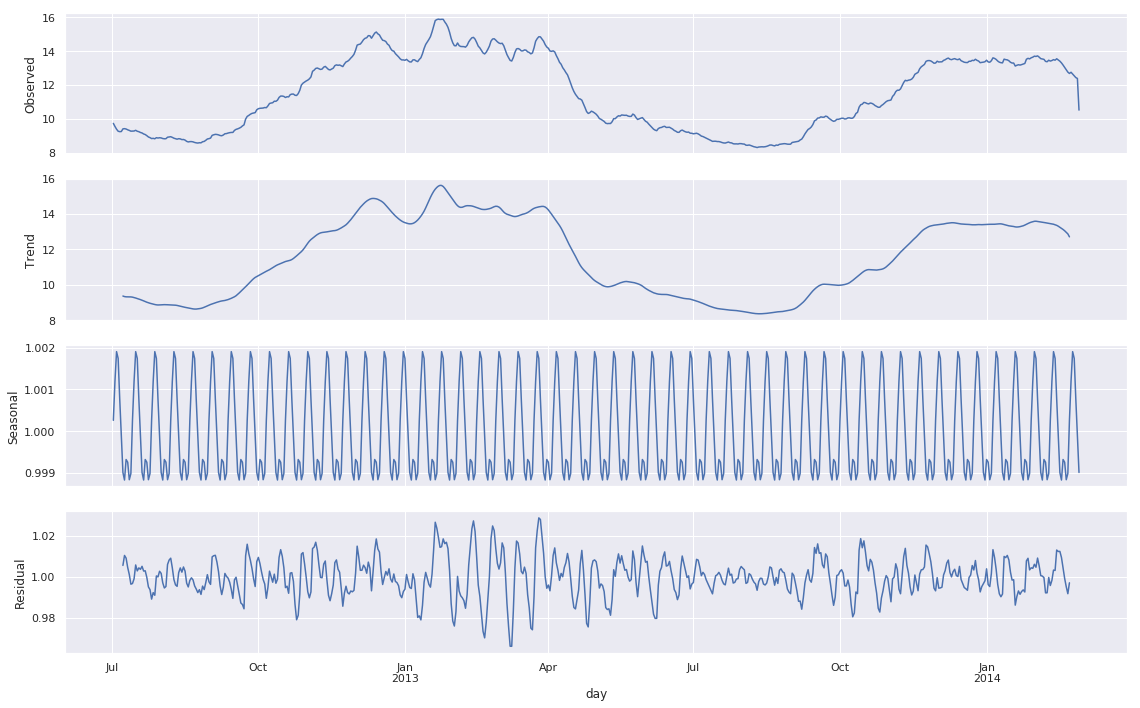

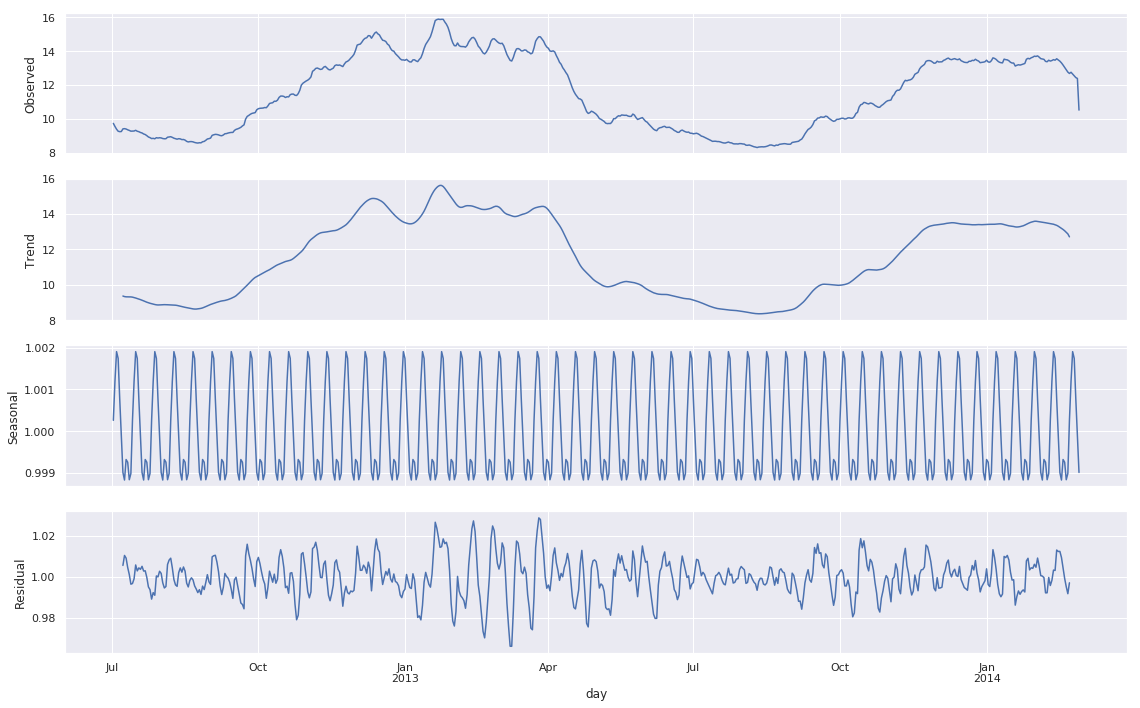

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(energy_sum_2, model='multiplicative', freq=12)
result.plot()

In [25]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

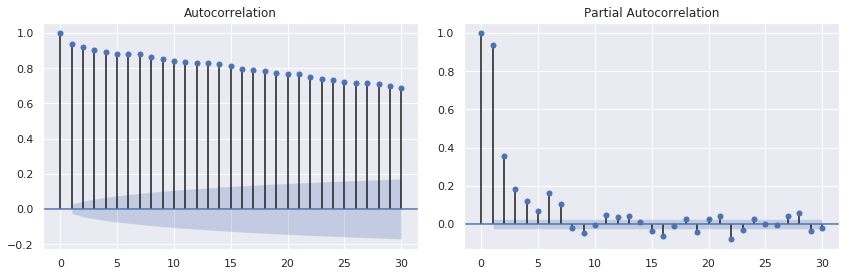

In [31]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(energy_sum_2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(energy_sum_2, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

## Visualize

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})

(0, 1)

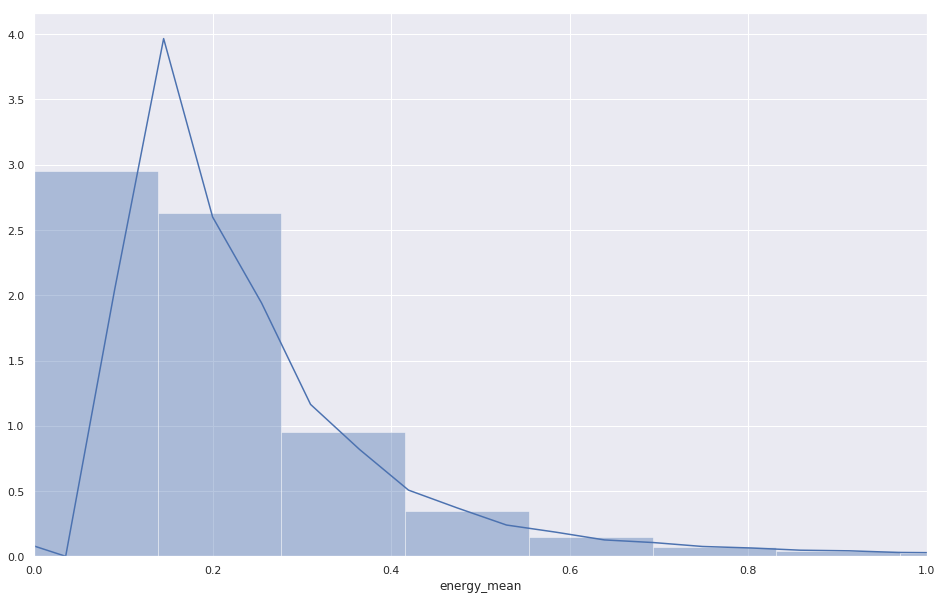

In [89]:
sns.distplot(block_daily['energy_mean'])
plt.xlim(0,1)

In [90]:
grouped_block_daily_count = block_daily.groupby(['day', 'Acorn_grouped'])['energy_count'].count()

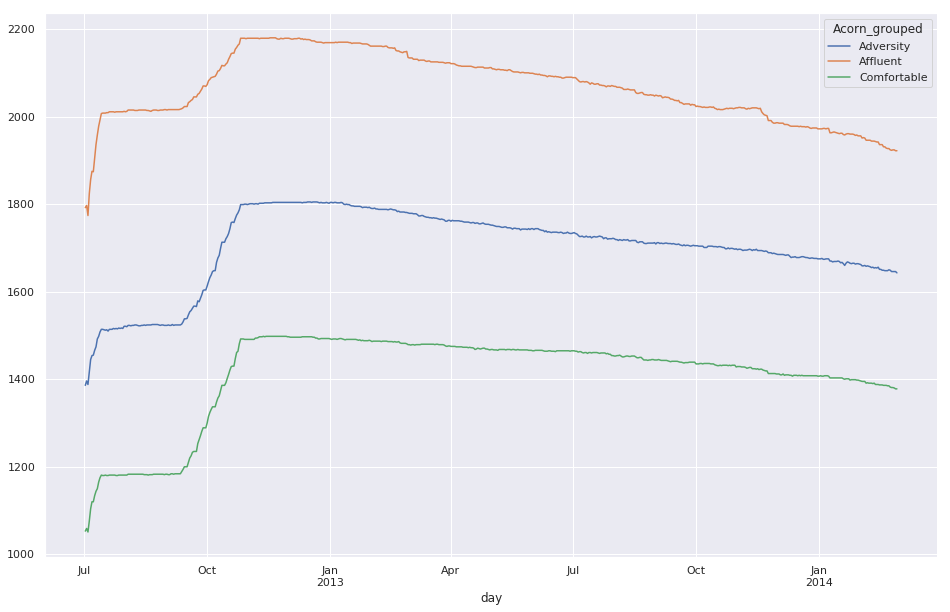

In [91]:
grouped_block_daily_count.unstack().plot()

In [92]:
##Total amount consumed per group per day
grouped_block_daily_sum = block_daily.groupby(['day', 'Acorn_grouped'])['energy_sum'].sum()

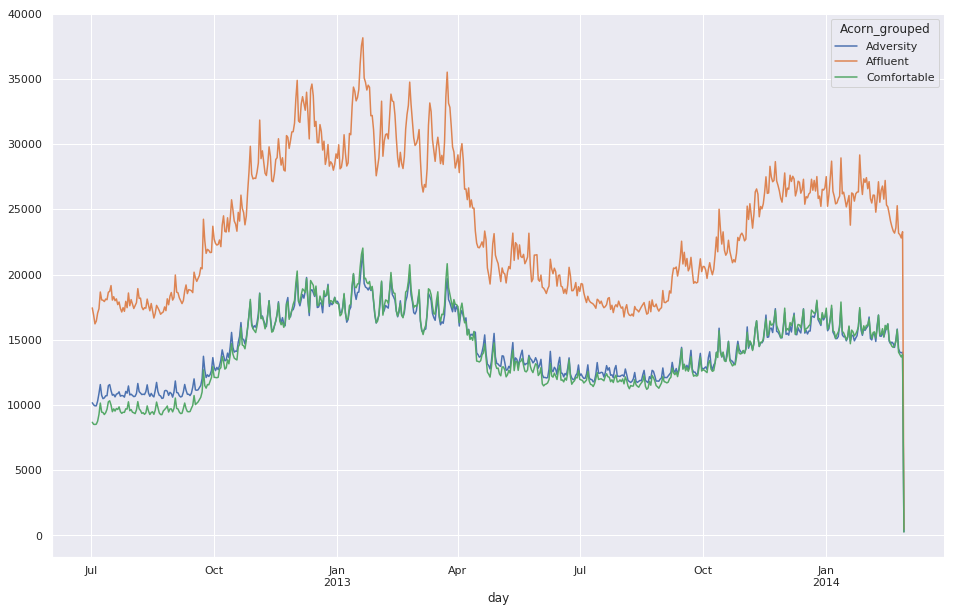

In [93]:
grouped_block_daily_sum.unstack().plot()

In [94]:
##Average amount consumed per group per day
grouped_block_daily_average = block_daily.groupby(['day', 'Acorn_grouped'])['energy_sum'].mean()

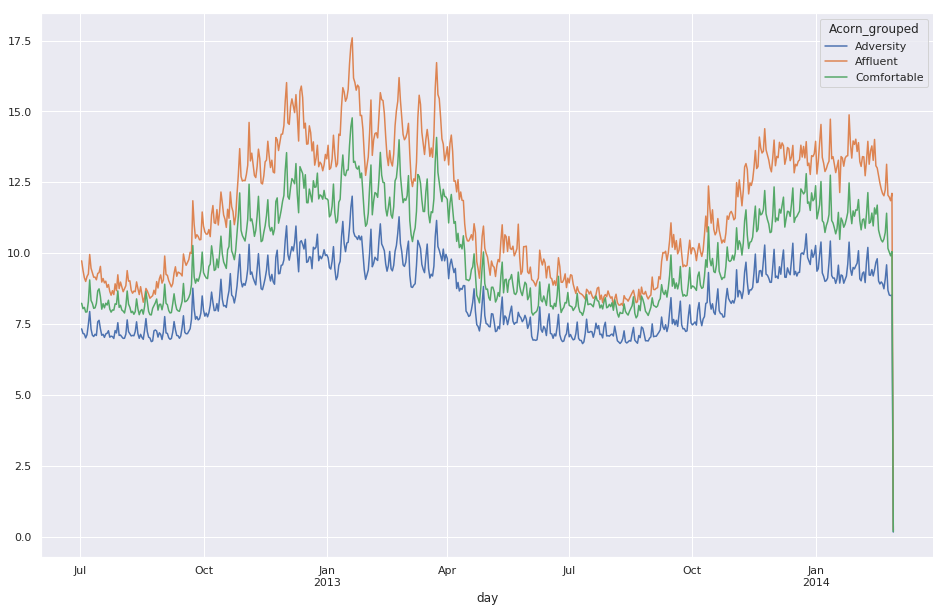

In [95]:
grouped_block_daily_average.unstack().plot()

In [136]:
Aff_energy_sum = block_daily[(block_daily.Acorn_grouped == 'Affluent')][['day','energy_sum']].groupby('day')['energy_sum'].mean()
Adv_energy_sum = block_daily[(block_daily.Acorn_grouped == 'Adversity')][['day','energy_sum']].groupby('day')['energy_sum'].mean()
Com_energy_sum = block_daily[(block_daily.Acorn_grouped == 'Comfortable')][['day','energy_sum']].groupby('day')['energy_sum'].mean()

In [137]:
Aff_energy_sum_model = Aff_energy_sum['2012-07-01':'2013-11-01']

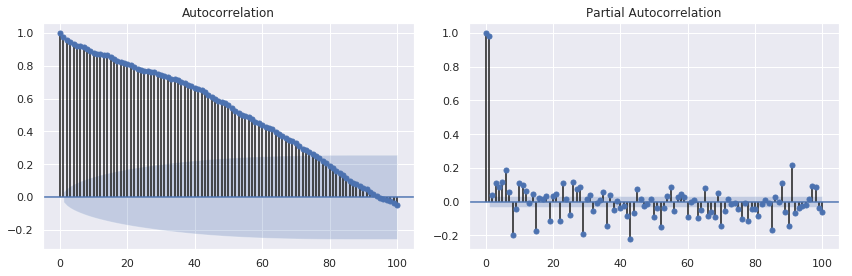

In [139]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(Aff_energy_sum_model, lags=100, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(Aff_energy_sum_model, lags=100, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [147]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(Aff_energy_sum_model, order=(0,1,1), seasonal_order=(1,1,1,6))
results = model.fit()
print(results.summary())

/home/rob/anaconda3/envs/smlondon/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                        energy_sum   No. Observations:                  488
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -350.735
Date:                           Sun, 22 Jul 2018   AIC                            709.471
Time:                                   17:30:56   BIC                            726.174
Sample:                               07-02-2012   HQIC                           716.036
                                    - 11-01-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0703      0.037     -1.884      0.060      -0.143       0.003
ar.S.L6        0.0296      0.043      0.683

In [148]:
#order=(0,1,0), seasonal_order=(1,1,1,12) - AIC - 720.325
#order=(0,1,0), seasonal_order=(1,1,1,12) - AIC - 722.426
#order=(0,0,1), seasonal_order=(1,1,1,12) - AIC - 722.426

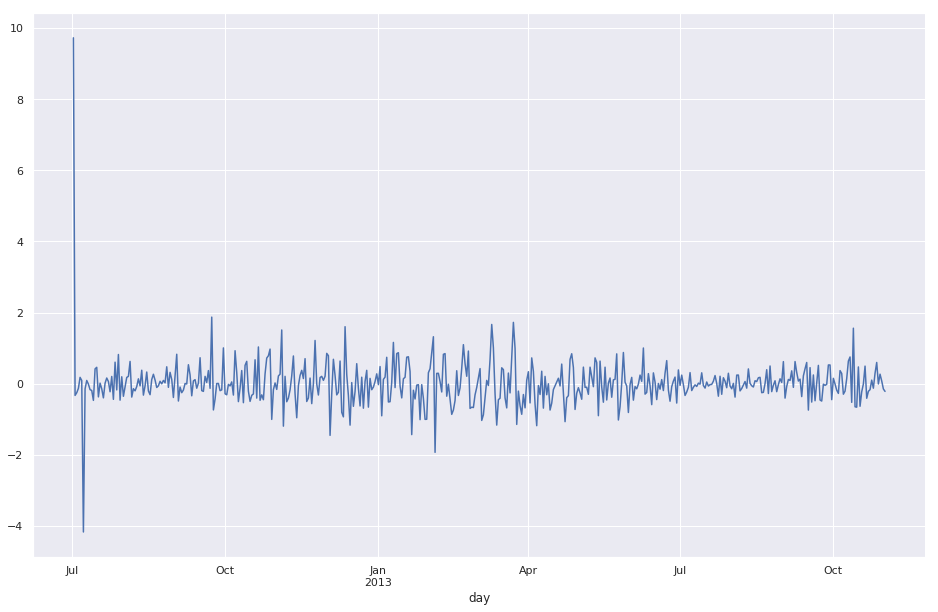

In [149]:
results.resid.plot()

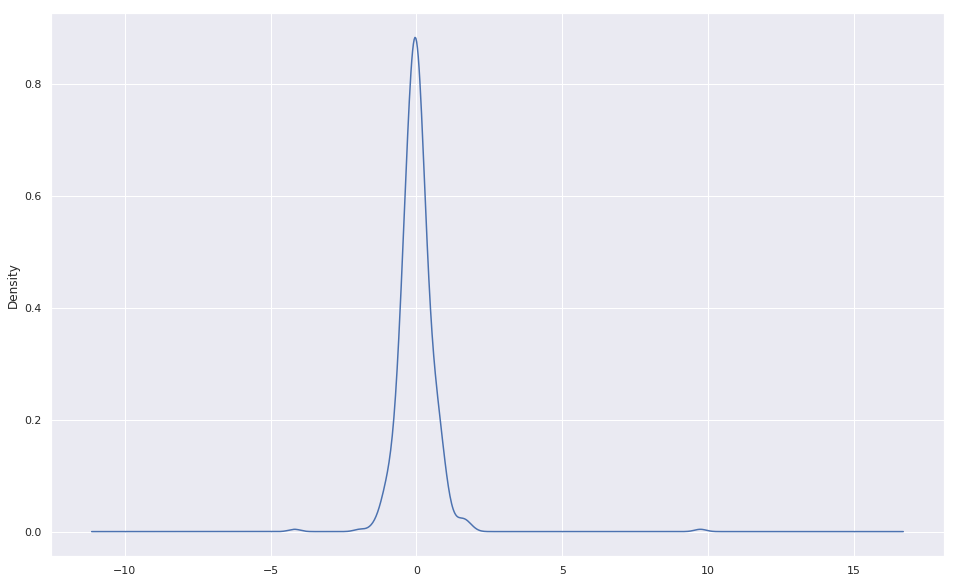

In [150]:
results.resid.plot(kind='kde')

In [151]:
Aff_energy_sum_forcast = pd.DataFrame(Aff_energy_sum)

In [152]:
Aff_energy_sum_forcast.head()

,energy_sum
day,
2012-07-02,9.734490
2012-07-03,9.400774
2012-07-04,9.142892
2012-07-05,9.008184
2012-07-06,9.182876


/home/rob/anaconda3/envs/smlondon/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


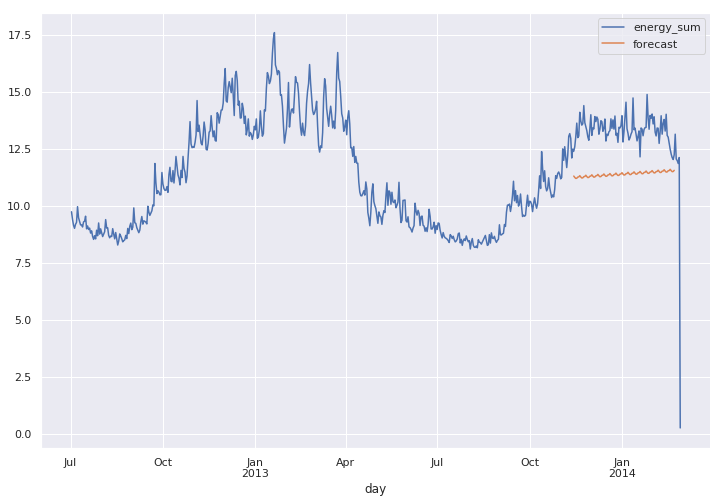

In [153]:
Aff_energy_sum_forcast['forecast'] = results.predict(start = 500, end= 600, dynamic= True)  
Aff_energy_sum_forcast[['energy_sum','forecast']].plot(figsize=(12,8))